Implementing the Klausmeier ODE System, doing some simulations.

###### [1] Klausmeier, C. A. (1999). Regular and irregular patterns in semiarid vegetation. *Science, 284*(5421), 1826-1828. https://doi.org/10.1126/science.284.5421.1826


In [1]:
using Pkg
Pkg.activate("C:/Users/lisah/Documents/Repos/ma-code")

  Activating project at `C:\Users\lisah\Documents\Repos\ma-code`


In [2]:
using DifferentialEquations, CSV, DataFrames, Plots

In [3]:
# define spatially homogeneous version of Klausmeier model
function klausmeier!(du,u,p,t)
 du[1] = -u[1] - u[1] * u[2]^2 + p[1] # water compartment
 du[2] = u[1] * u[2]^2 - p[2] * u[2] # biomass compartment
end

klausmeier! (generic function with 1 method)

##### try to solve for some prms
goal is to examine which influence choice of w0 has for fixed (a,n0) combination.

In [ ]:
u0 = [0.9;1.3]          # initial conditions
tspan = (0.0,29.0)      # start and end point of the time period to be considered
a = 0.9
m = 0.45                # value as in [1]
p = [a;m]

prob = ODEProblem(klausmeier!, u0, tspan, p)
sol = solve(prob,
    saveat=1.0  # consider specific time points
    )

df_sol = DataFrame(time=sol.t, u1=sol[1, :], u2=sol[2, :])


Row,time,u1,u2
,Float64,Float64,Float64
1,0.0,0.9,1.3
2,1.0,0.262894,1.67121
3,2.0,0.248604,1.5998
4,3.0,0.26584,1.52334
5,4.0,0.28207,1.46182
6,5.0,0.296194,1.41214
7,6.0,0.308448,1.37141
8,7.0,0.319113,1.33754
9,8.0,0.32844,1.30903


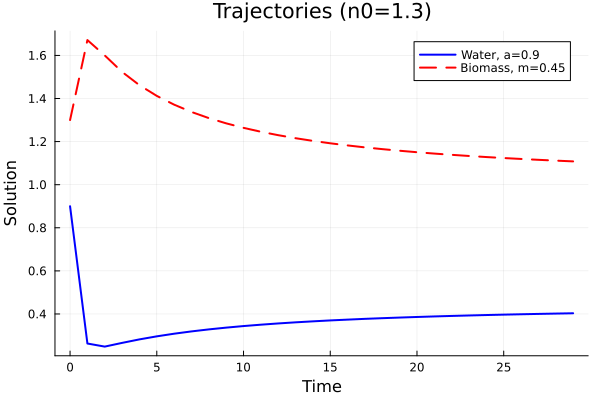

In [5]:
# plot for better visualization
plot(df_sol.time, df_sol.u1, label="Water, a=$a", lw=2, color=:blue)
plot!(df_sol.time, df_sol.u2, label="Biomass, m=$m", lw=2, linestyle=:dash, color=:red)

xlabel!("Time")
ylabel!("Solution")
title!("Trajectories (n0=$(u0[2]))")

Results:
- as we use only n-trajectory in the computation of the likelihood, we are only interested in how the red curve changes for initial w0 values
- "converges" after few (2-5) time steps
- differences are not big (visually) for different values of w0

-> for now I use w0=0.9 (i.e. mean across all a values I consider)

## vary sample size in fixed time window

In [43]:
t_end = 50.0
M = 500
u0 = [0.9;1.3]          # initial conditions
tspan = (0.0,t_end)      # start and end point of the time period to be considered
a = 0.9
m = 0.45                # value as in [1]
p = [a;m]
steps = range(0.0, stop=t_end, length=M)

prob = ODEProblem(klausmeier!, u0, tspan, p)
sol = solve(prob,
    saveat=steps  # consider specific time points
    )

df_sol = DataFrame(time=sol.t, u1=sol[1, :], u2=sol[2, :]);

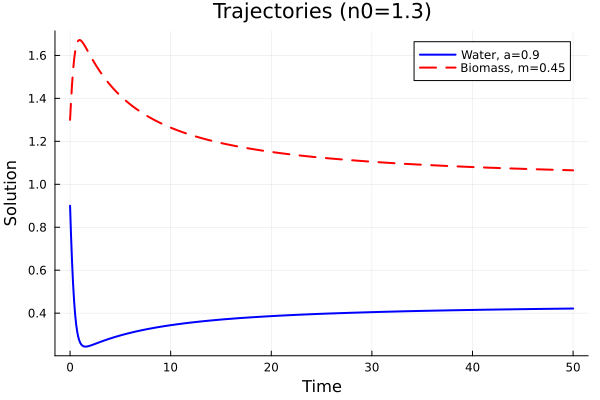

In [44]:
# plot for better visualization
plot(df_sol.time, df_sol.u1, label="Water, a=$a", lw=2, color=:blue)
plot!(df_sol.time, df_sol.u2, label="Biomass, m=$m", lw=2, linestyle=:dash, color=:red)

xlabel!("Time")
ylabel!("Solution")
title!("Trajectories (n0=$(u0[2]))")